<a href="https://colab.research.google.com/github/jjoy20/data-visualization/blob/main/histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
%matplotlib inline
import pylab as pl
import warnings
warnings.filterwarnings('ignore')

In [175]:
df = pd.read_csv("sales.csv")
df.head(20)


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
5,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1139.0,90.0,80.0,130.0,210.0,2,08/01/11 00:00:00,Coffee,Columbian,Regular
6,203,Connecticut,East,Small Market,135.0,155.0,275.0,103.0,64.0,33.0,1130.0,110.0,90.0,150.0,240.0,2,09/01/11 00:00:00,Coffee,Columbian,Regular
7,203,Connecticut,East,Small Market,171.0,188.0,334.0,125.0,73.0,41.0,1119.0,130.0,100.0,160.0,260.0,2,10/01/11 00:00:00,Coffee,Columbian,Regular
8,203,Connecticut,East,Small Market,181.0,195.0,346.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/11 00:00:00,Coffee,Columbian,Regular
9,203,Connecticut,East,Small Market,15.0,31.0,51.0,20.0,16.0,5.0,804.0,20.0,20.0,30.0,50.0,13,06/01/10 00:00:00,Tea,Green Tea,Regular


In [120]:
df.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
dtype: object

In [121]:
df.dropna

<bound method DataFrame.dropna of       Area Code        State Market   Market Size  Profit  Margin  Sales  \
0           203  Connecticut   East  Small Market   107.0   176.0  292.0   
1           203  Connecticut   East  Small Market    75.0   135.0  225.0   
2           203  Connecticut   East  Small Market   122.0   195.0  325.0   
3           203  Connecticut   East  Small Market   105.0   174.0  289.0   
4           203  Connecticut   East  Small Market   104.0   135.0  223.0   
...         ...          ...    ...           ...     ...     ...    ...   
4243        985    Louisiana  South  Small Market    -6.0    66.0  113.0   
4244        985    Louisiana  South  Small Market    -7.0    61.0  105.0   
4245        985    Louisiana  South  Small Market    -3.0    76.0  131.0   
4246        985    Louisiana  South  Small Market     1.0    87.0  160.0   
4247        985    Louisiana  South  Small Market     4.0    90.0  153.0   

       COGS  Total Expenses  Marketing  Inventory  Bu

In [122]:
df

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular


In [173]:
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [124]:
df.shape

(4248, 20)

In [125]:
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns contain \'null\' values: \n\n{columns_contains_null}')

Columns contain 'null' values: 

[]


In [221]:
df.drop_duplicates()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Type
Product,,,,,,,,,,,,,,,,,,,
Columbian,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Regular
Columbian,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Regular
Columbian,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Regular
Columbian,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Regular
Columbian,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caffe Latte,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Regular
Caffe Latte,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Regular
Caffe Latte,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Regular


In [222]:
df.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Type               object
dtype: object

In [180]:
df.set_index('Product', inplace=True)

# # Let's view the first five elements and see how the dataframe was changed
# df.head()

In [235]:
from pandas.core.indexes.datetimes import date

d_ps = df[['Total Expenses','Profit','Marketing','Date']].loc['Columbian'].head(10)
d_ps

,Total Expenses,Profit,Marketing,Date
Product,,,,
Columbian,69.0,107.0,38.0,04/01/10 00:00:00
Columbian,60.0,75.0,29.0,07/01/10 00:00:00
Columbian,73.0,122.0,42.0,11/01/10 00:00:00
Columbian,69.0,105.0,37.0,12/01/10 00:00:00
Columbian,56.0,104.0,29.0,07/01/11 00:00:00
Columbian,56.0,104.0,29.0,08/01/11 00:00:00
Columbian,64.0,135.0,33.0,09/01/11 00:00:00
Columbian,73.0,171.0,41.0,10/01/11 00:00:00
Columbian,73.0,181.0,42.0,11/01/11 00:00:00


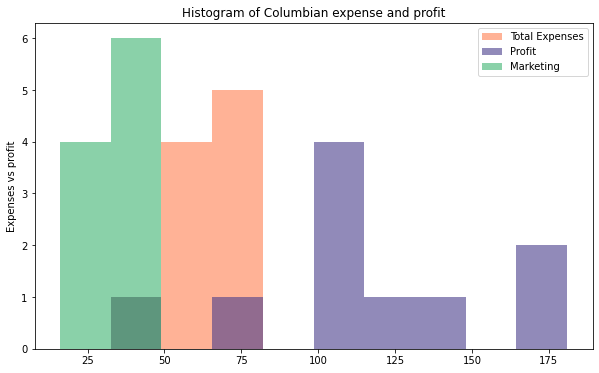

In [241]:
# generate histogram

d_ps.plot(kind='hist', figsize=(10, 6),alpha=0.6,color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Columbian expense and profit')

plt.ylabel('Expenses vs profit')

plt.show()